In [1]:
import numpy as np
import matplotlib.pyplot as plt

import comp_giannoulis as comp

In [2]:
# Compressor parameters
fS = 48e3
# Attack and release time
t_A = 20e-3
t_R = 100e-3

#Threshold in dB
T = -5
# Ratio
R = 3000
# Knee Width in dB
W = 0

# Makeup gain in dB
M = 0

In [3]:
# Testsignal
#Signal frequency in Hz
f_sig = 50
#Length of the test signal in s
sig_len = 3
# Gain sweep length, before max is reached in s
sweep_len = 2

# Time vector
t = np.linspace(0,sig_len,int(fS)*sig_len)

gain_sweep = np.ones(t.shape)

gain_sweep[:int(fS*sig_len/(sig_len/sweep_len))] = np.linspace(0,1, int(fS*sig_len/(sig_len/sweep_len)))
input = np.sin(2*np.pi*f_sig*t)*gain_sweep

In [4]:
# Compressor configuration according to Fig.7, c)
# Return to threshold detector
abs_out_log = comp.c_abs(input)
dB_out_log = comp.calc_dB(data=abs_out_log)
gain_computer_out_log = dB_out_log-comp.gain_computer(data=dB_out_log, threshold=T, ratio=R, knee_width=W)
level_detector_out_log = comp.level_detector(data=gain_computer_out_log, attack=t_A, release=t_R)
makeup_gain_out_log = M - level_detector_out_log
control_sig_log = comp.linearize(data=makeup_gain_out_log)
output_log = input*control_sig_log

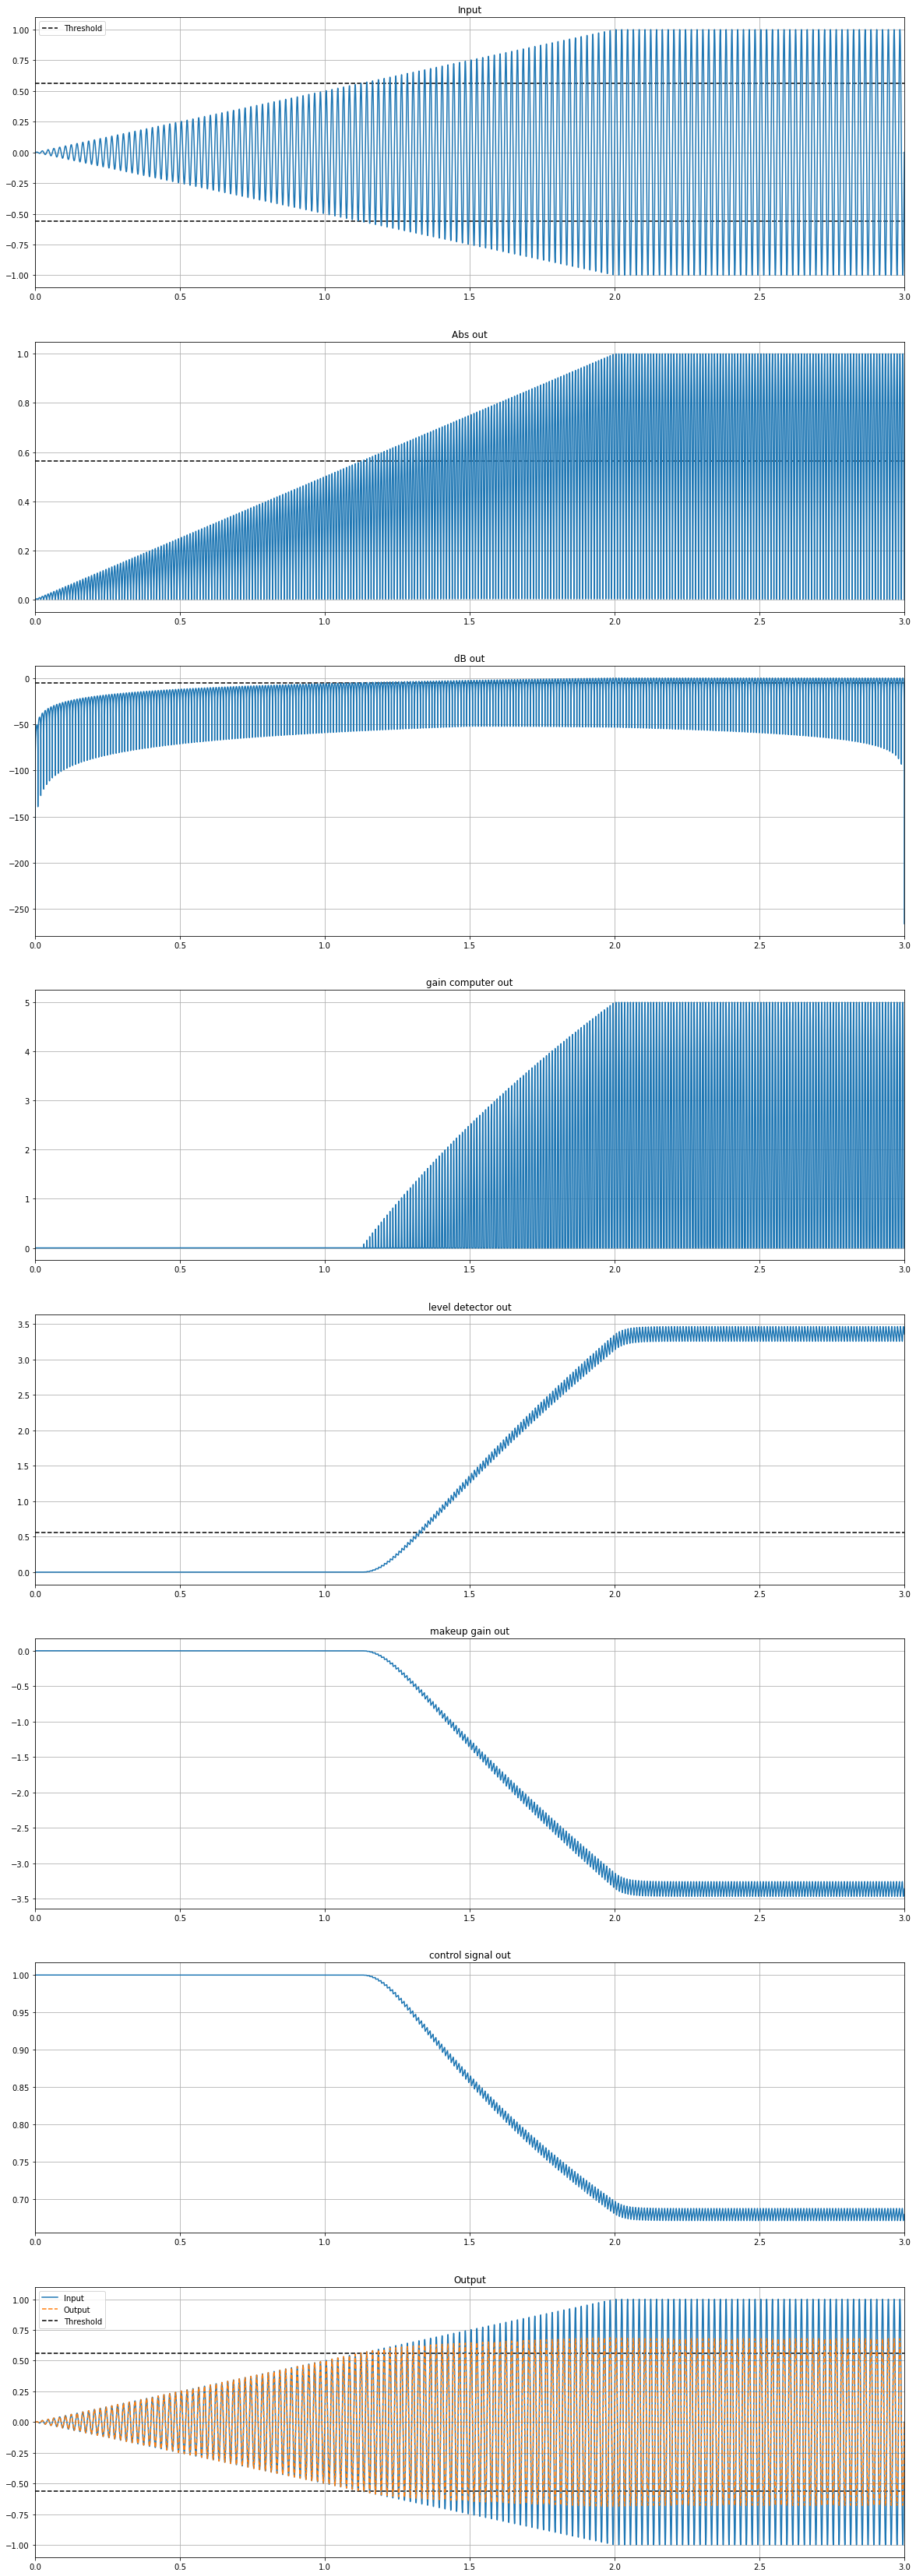

In [5]:
xlim = [0, sig_len]
no_of_plots = 8
i=1

plt.figure(figsize=(20,60))

plt.subplot(no_of_plots,1,i)
plt.plot(t, input)
plt.hlines(y=10**(T/20), xmin=xlim[0], xmax=xlim[1], linestyles='dashed', label="Threshold")
plt.hlines(y=-10**(T/20), xmin=xlim[0], xmax=xlim[1], linestyles='dashed')
plt.grid(True, which="both")
plt.title("Input")
plt.legend()
plt.xlim(xlim)
i+=1

plt.subplot(no_of_plots,1,i)
plt.plot(t, abs_out_log)
plt.hlines(y=10**(T/20), xmin=xlim[0], xmax=xlim[1], linestyles='dashed')
plt.grid(True, which="both")
plt.title("Abs out")
plt.xlim(xlim)
i+=1

plt.subplot(no_of_plots,1,i)
plt.plot(t, dB_out_log)
plt.hlines(y=T, xmin=xlim[0], xmax=xlim[1], linestyles='dashed')
plt.grid(True, which="both")
plt.title("dB out")
plt.xlim(xlim)
i+=1

plt.subplot(no_of_plots,1,i)
plt.plot(t, gain_computer_out_log)
#plt.hlines(y=T, xmin=xlim[0], xmax=xlim[1], linestyles='dashed')
plt.grid(True, which="both")
plt.title("gain computer out")
plt.xlim(xlim)
i+=1

plt.subplot(no_of_plots,1,i)
plt.plot(t, level_detector_out_log)
plt.hlines(y=10**(T/20), xmin=xlim[0], xmax=xlim[1], linestyles='dashed')
plt.grid(True, which="both")
plt.title("level detector out")
plt.xlim(xlim)
i+=1

plt.subplot(no_of_plots,1,i)
plt.plot(t, makeup_gain_out_log)
plt.grid(True, which="both")
plt.title("makeup gain out")
plt.xlim(xlim)
i+=1

plt.subplot(no_of_plots,1,i)
plt.plot(t, control_sig_log)
plt.grid(True, which="both")
plt.title("control signal out")
plt.xlim(xlim)
i+=1

plt.subplot(no_of_plots, 1, i)
plt.plot(t,input, label="Input")
plt.plot(t, output_log,'--', label="Output")
plt.hlines(y=10**(T/20), xmin=xlim[0], xmax=xlim[1], linestyles='dashed', label="Threshold")
plt.hlines(y=-10**(T/20), xmin=xlim[0], xmax=xlim[1], linestyles='dashed')
plt.title("Output")
plt.legend()
plt.grid(True, which="both")
plt.xlim(xlim)
i+=1